In [4]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stili ayarlayalım
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/gulizkonca/Downloads/video games sales.csv')


print(df.head())



   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [6]:

# Kolon isimlerine bakalım
print("\nKolonlar:", df.columns.tolist())

# Veri seti bilgisi
print("\nVeri seti bilgisi:")
print(df.info())

# Eksik veri analizi
print("\nEksik veri kontrolü:")
print(df.isnull().sum())

# Temel istatistikler
print("\nTemel istatistikler:")
print(df.describe())


Kolonlar: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

Eksik veri kontrolü:
Rank              0
Name              0
Platform          0
Year            271
Genre 

In [10]:
# Önemli: Eksik verileri inceleyelim

# Eksik olan Year verilerini gösterelim
print("\nYılı eksik olan kayıtlar:")
print(df[df['Year'].isnull()])

# Eksik olan Publisher verilerini gösterelim
print("\nPublisher'ı eksik olan kayıtlar:")
print(df[df['Publisher'].isnull()])

# Şu anda eksik Year ve Publisher verilerini istersek silebiliriz
# Çok fazla kayıt eksik değil, silebiliriz:

df = df.dropna(subset=['Year', 'Publisher'])

# Temizlenmiş veri seti boyutunu görelim
print("\nTemizlenmiş veri seti boyutu:", df.shape)





Yılı eksik olan kayıtlar:
Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

Publisher'ı eksik olan kayıtlar:
Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

Temizlenmiş veri seti boyutu: (16291, 11)


In [12]:
# Şimdi kaç farklı oyun var onu bulalım
print("\nToplam oyun sayısı:", df['Name'].nunique())



Toplam oyun sayısı: 11325


In [14]:

# Kaç farklı platform var?
print("\nToplam platform sayısı:", df['Platform'].nunique())
print(df['Platform'].value_counts())



Toplam platform sayısı: 31
Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


In [16]:

# Kaç farklı tür (genre) var?
print("\nToplam tür (genre) sayısı:", df['Genre'].nunique())
print(df['Genre'].value_counts())


Toplam tür (genre) sayısı: 12
Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64



En Çok Satan 10 Oyun:
                                Global_Sales
Name                                        
Wii Sports                             82.74
Grand Theft Auto V                     55.92
Super Mario Bros.                      45.31
Tetris                                 35.84
Mario Kart Wii                         35.82
Wii Sports Resort                      33.00
Pokemon Red/Pokemon Blue               31.37
Call of Duty: Modern Warfare 3         30.83
New Super Mario Bros.                  30.01
Call of Duty: Black Ops II             29.72


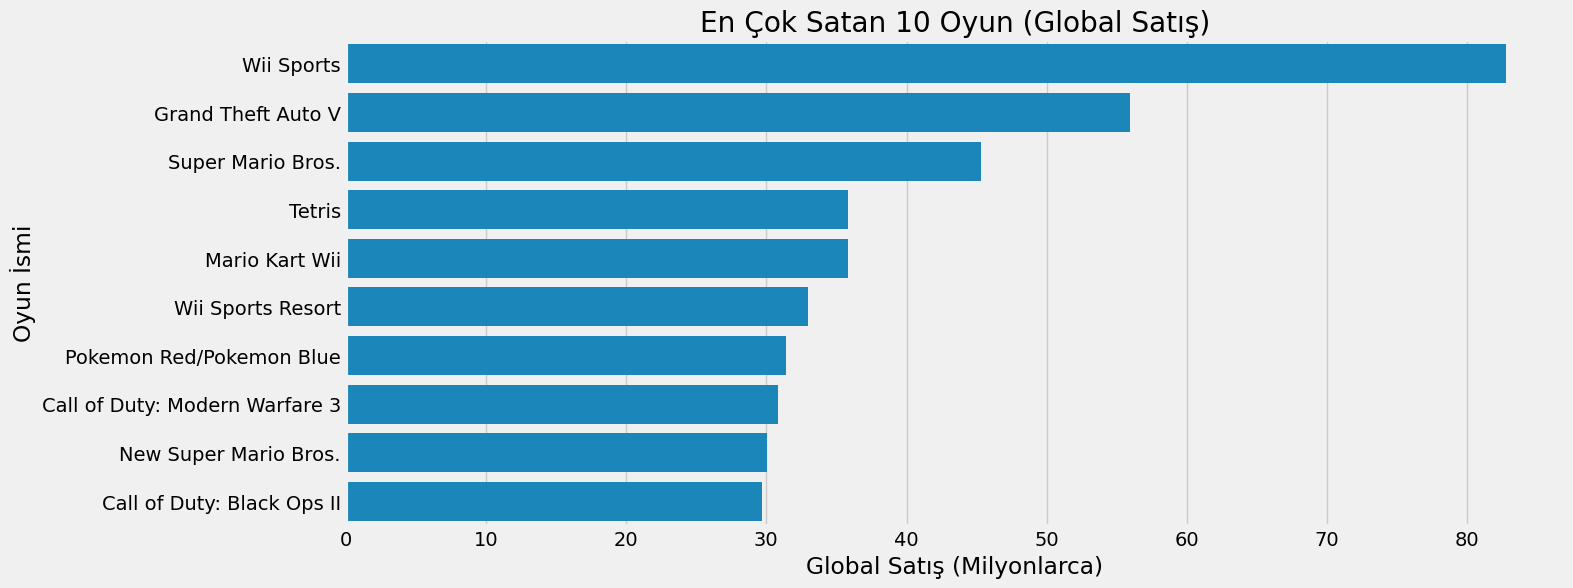

In [18]:
# En çok satan 10 oyun (Global satışa göre)
top_10_games = df[['Name', 'Global_Sales']].groupby('Name').sum().sort_values('Global_Sales', ascending=False).head(10)

print("\nEn Çok Satan 10 Oyun:")
print(top_10_games)

# Grafikle gösterelim
plt.figure(figsize=(14,6))
sns.barplot(x=top_10_games['Global_Sales'], y=top_10_games.index)
plt.title('En Çok Satan 10 Oyun (Global Satış)')
plt.xlabel('Global Satış (Milyonlarca)')
plt.ylabel('Oyun İsmi')
plt.show()



En Çok Satan Platformlar:
Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64


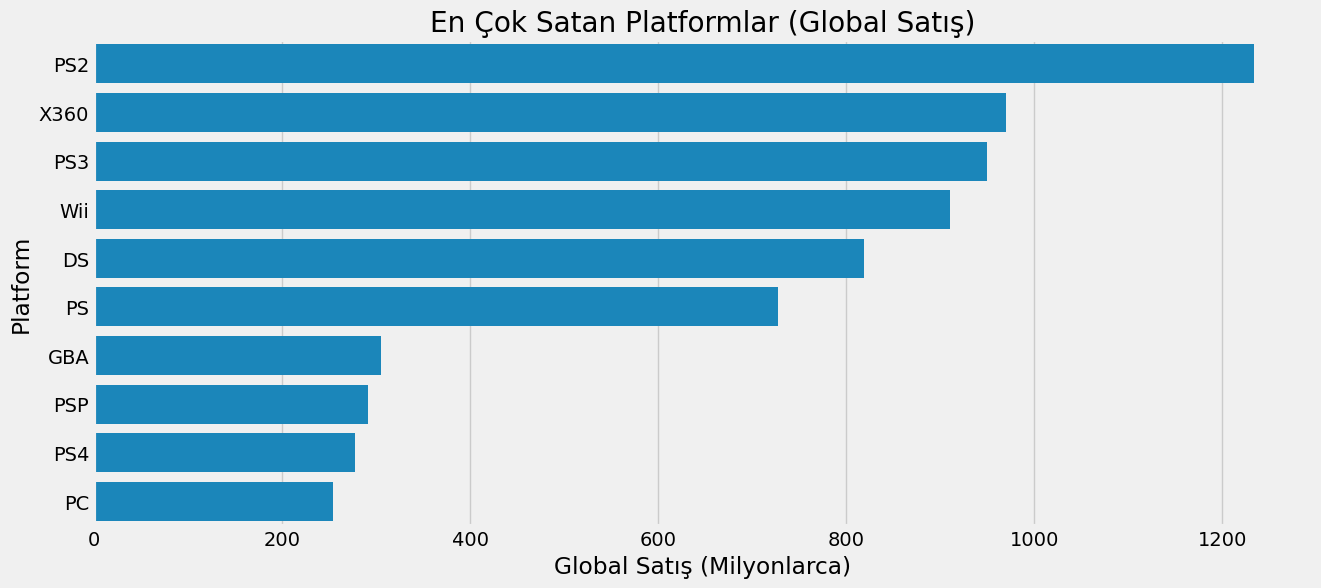

In [20]:
# Platformlara göre toplam satış
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

print("\nEn Çok Satan Platformlar:")
print(platform_sales.head(10))

# Grafikle gösterelim
plt.figure(figsize=(14,6))
sns.barplot(x=platform_sales.head(10).values, y=platform_sales.head(10).index)
plt.title('En Çok Satan Platformlar (Global Satış)')
plt.xlabel('Global Satış (Milyonlarca)')
plt.ylabel('Platform')
plt.show()



En Çok Satan Türler:
Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64


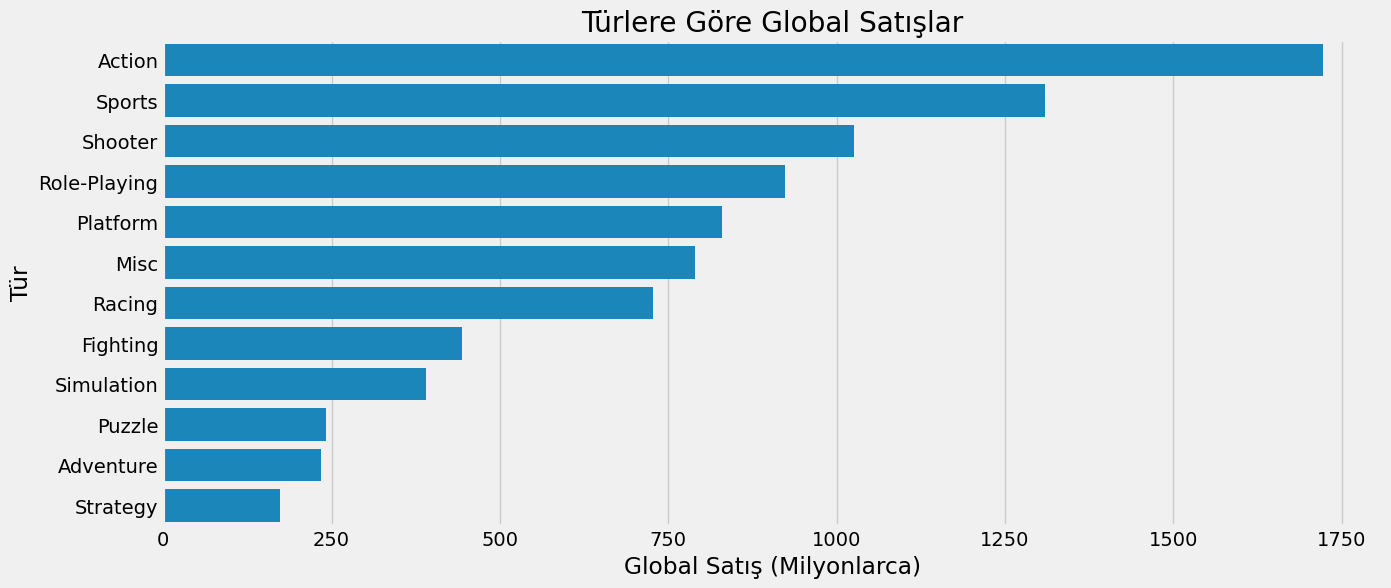

In [22]:
# Türlere göre toplam satış
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

print("\nEn Çok Satan Türler:")
print(genre_sales)

# Grafikle gösterelim
plt.figure(figsize=(14,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title('Türlere Göre Global Satışlar')
plt.xlabel('Global Satış (Milyonlarca)')
plt.ylabel('Tür')
plt.show()



Bölgesel Satışlar (Toplam):
NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64


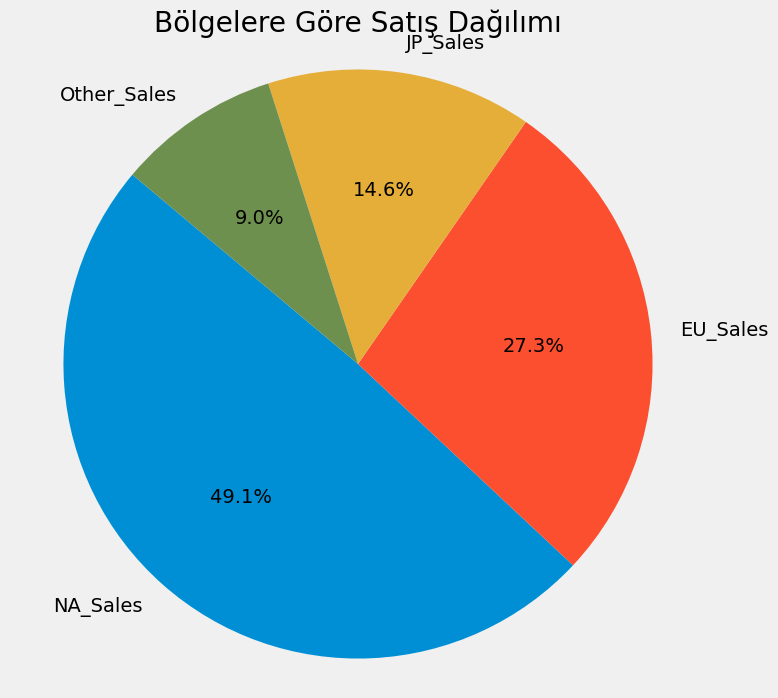

In [24]:
# Kuzey Amerika, Avrupa, Japonya ve Diğer bölgelerin toplam satışlarını karşılaştıralım
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print("\nBölgesel Satışlar (Toplam):")
print(region_sales)

# Pasta grafiği ile gösterelim
plt.figure(figsize=(8,8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Bölgelere Göre Satış Dağılımı')
plt.axis('equal')
plt.show()



Yıllara göre toplam satışlar:
Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.30
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
2016.0     70.90
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64


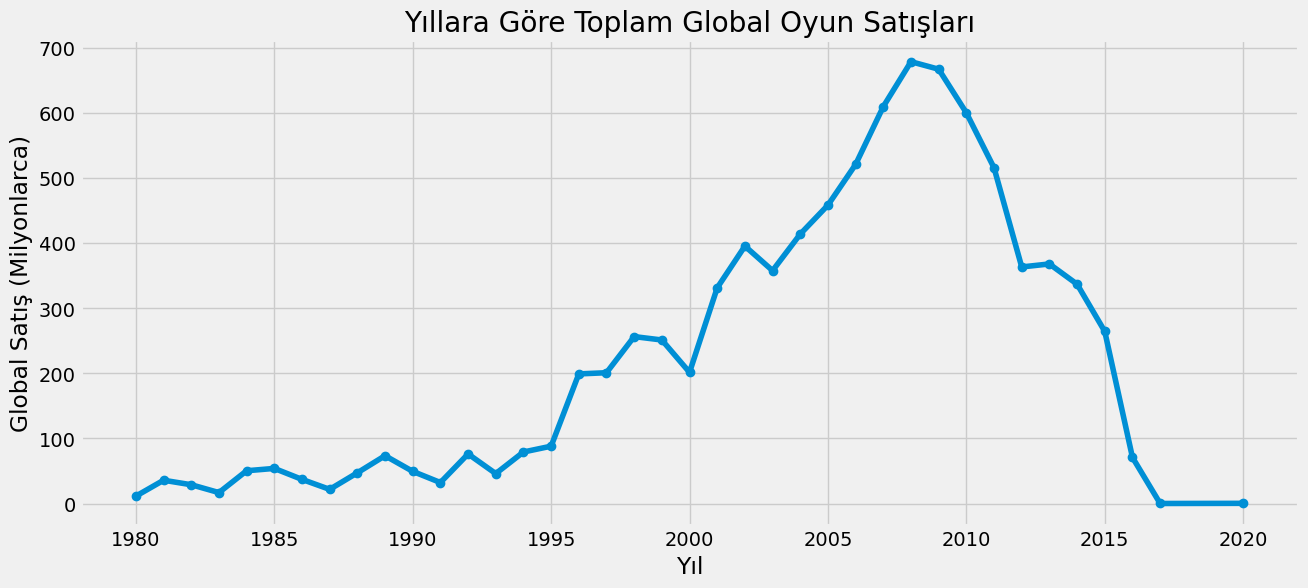

In [26]:
# Yıllara göre toplam global satış
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

print("\nYıllara göre toplam satışlar:")
print(yearly_sales)

# Çizgi grafiği ile gösterelim
plt.figure(figsize=(14,6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Yıllara Göre Toplam Global Oyun Satışları')
plt.xlabel('Yıl')
plt.ylabel('Global Satış (Milyonlarca)')
plt.grid(True)
plt.show()



Yıllara göre çıkan oyun sayısı:
Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: count, dtype: int64


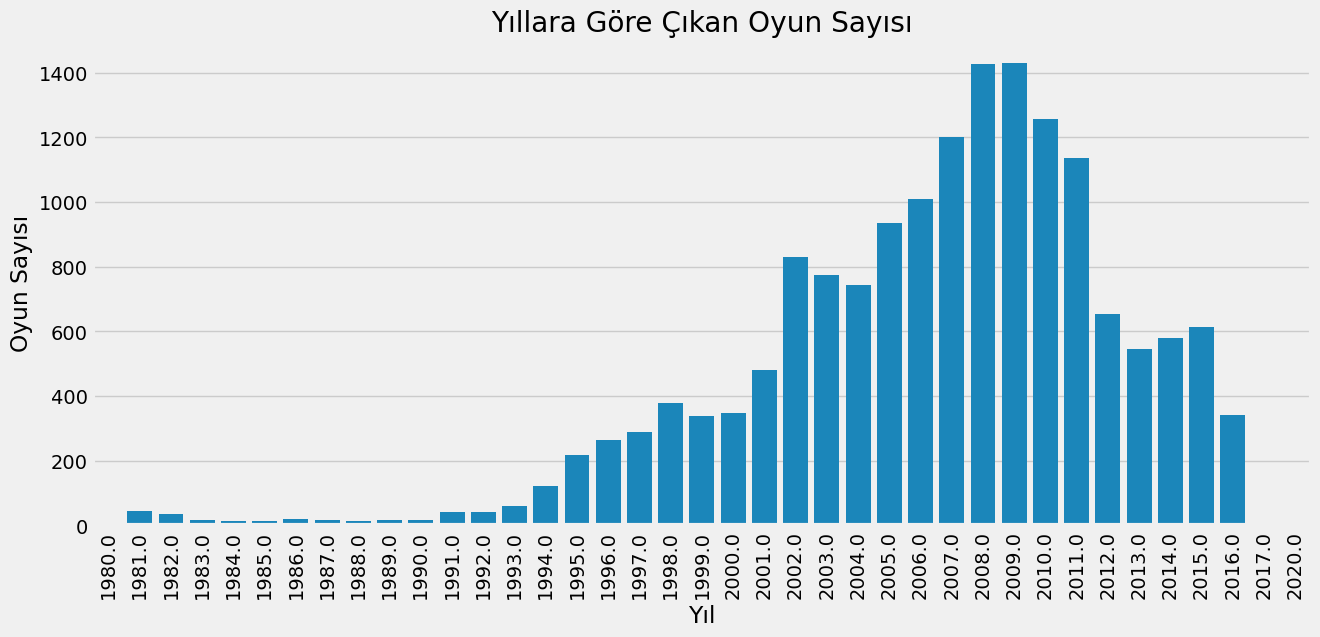

In [28]:
# Yıllara göre çıkan oyun sayısı
yearly_game_count = df['Year'].value_counts().sort_index()

print("\nYıllara göre çıkan oyun sayısı:")
print(yearly_game_count)

# Çubuk grafiği ile gösterelim
plt.figure(figsize=(14,6))
sns.barplot(x=yearly_game_count.index, y=yearly_game_count.values)
plt.title('Yıllara Göre Çıkan Oyun Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Oyun Sayısı')
plt.xticks(rotation=90)
plt.show()


In [30]:
# En çok satış yapılan yıl
best_year = yearly_sales.idxmax()
best_sales = yearly_sales.max()

print(f"\nEn çok satış yapılan yıl: {best_year} ({best_sales:.2f} milyon adet)")

# En çok oyun çıkan yıl
most_games_year = yearly_game_count.idxmax()
most_games_count = yearly_game_count.max()

print(f"En çok oyun çıkan yıl: {most_games_year} ({most_games_count} oyun)")



En çok satış yapılan yıl: 2008.0 (678.90 milyon adet)
En çok oyun çıkan yıl: 2009.0 (1431 oyun)
